In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
hw=pd.read_csv('https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv')

In [3]:
hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
hw.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([54.26313333, 56.73669423, 59.21025513, 61.68381603, 64.15737693,
        66.63093784, 69.10449874, 71.57805964, 74.05162054, 76.52518144,
        78.99874235]),
 <BarContainer object of 10 artists>)

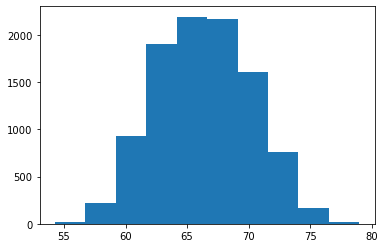

In [5]:
plt.hist(hw.Height)

In [6]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [7]:
stats.shapiro(hw.Height)

C:\anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9960622191429138, pvalue=8.158031071868303e-16)

In [8]:
stats.shapiro(hw.Weight)

ShapiroResult(statistic=0.9862456321716309, pvalue=5.538567140735469e-30)

In [9]:
hw.shape

(10000, 3)

In [10]:
train=hw.iloc[:8000]

In [11]:
test=hw.iloc[8000:]

In [12]:
train.shape

(8000, 3)

In [13]:
test.shape

(2000, 3)

In [14]:
from scipy.stats import pearsonr


In [15]:
corr, _ = pearsonr(hw.Height,hw.Weight)

In [16]:
corr

0.9247562987409147

In [17]:
_

0.0

In [18]:
import statsmodels.api as sm


In [19]:
train_x=train.Weight

In [20]:
train_y=train.Height

In [21]:
train_x=sm.add_constant(train_x)

C:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
train_x

,const,Weight
0,1.0,241.893563
1,1.0,162.310473
2,1.0,212.740856
3,1.0,220.042470
4,1.0,206.349801
...,...,...
7995,1.0,112.035274
7996,1.0,103.537756
7997,1.0,118.851401
7998,1.0,133.552942


In [23]:
model=sm.OLS(train_y,train_x).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 4.595e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:23:11   Log-Likelihood:                -14453.
No. Observations:                8000   AIC:                         2.891e+04
Df Residuals:                    7998   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3368      0.089    544.981      0.000      48.163      48.511
Weight         0.1114      0.001    214.369      0.000       0.110       0.112
==============================================================================
Omnibus:                        6.719   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.718
Skew:                          -0.071   Prob(JB):                       0.0348
Kurtosis:                       3.003   Cond. No.                         919.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.params

const     48.336762
Weight     0.111404
dtype: float64

In [26]:
test_x=test.Weight

In [27]:
test_y=test.Height

In [28]:
test_x=sm.add_constant(test_x)

C:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
test_x

,const,Weight
8000,1.0,118.513013
8001,1.0,122.561835
8002,1.0,106.782310
8003,1.0,87.298869
8004,1.0,110.815421
...,...,...
9995,1.0,136.777454
9996,1.0,170.867906
9997,1.0,128.475319
9998,1.0,163.852461


In [30]:
predict=model.predict(test_x)

In [31]:
predict

8000    61.539560
8001    61.990614
8002    60.232715
8003    58.062186
8004    60.682019
          ...    
9995    63.574288
9996    67.372093
9997    62.649399
9998    66.590546
9999    60.997702
Length: 2000, dtype: float64